# Understanding rates of change

Two of the most important concepts from calculus are the derivative and the integral. Both these operations work with functions.

> The derivative takes a function and gives you another function measuring its rate of change.

The integral does the opposite:
> The integral takes a function representing a rate of change and gives you back a function measuring the original cumulative value.

We can easily relate to the example in which we have a pump lifting crude oild out of a well, which is then transferred into an oil tank.

The pipe is equipped with a meter that continuously measures the rate of fluid flowing through it, and the tank is equipped with a sensor that detects the height of fluid in the tank.

![Rates of change and cumulative value](pics/rates-of-change-and-cumulative-value.png)

The volume sensor tells us the amount (volume) of oil in the tank, that is, the cumulative value. We can bank on this measurement to create a graph of the volume as a funtion of time.

The flow meter tells us the rate of flowing oil going through the pipe at any particular moment. We could use this measurement to create a graph of the flow rate as a function of time.

Considering the graph of the volume of oil as a function of time, we could calculate the flow rate as a function of time using the derivative.

Similarly, by using the integral, we could calculate the volume of oil as a function of time using the integral.

In Python terms, this means that we will be able to define two functions:
+ `get_flow_rate(volume_fn)` &mdash; takes a volume over time function and returns a Python function that gives us the flow rate as a function of time.
+ `get_volume(flow_rate_fn)` &mdash; takes a flow_rate over time function and returns a Python function that gives us the volume as a function of time.

## Setting up shop

This notebook uses a pypoetry kernel.

It includes an editable dependency to `plthlp` project to help with the visualization of functions using matplotlib.

That helps with all the messy `ln -s` commands that were used in previous chapters to make certain projects available to Jupyter notebook cells.

Instead, this time you only need to do:

```bash
poetry add --editable ../../02_mini-projects/20_matplotlib-helpers/
```

It will also be needed to type: 

```bash
poetry install --no-root
```

as there is no package/folder named `math-ipynb/`.

VSCode should be able to detect the Kernel from the pypoetry configured virtualenvs location, but if that doesn't happen, you should:

1. Open "07_understanding-rates-of-change/" on its own VSCode window.
2. Configure the kernel on that window. You might need to run `poetry install --no-root` again, or even create a dummy `main.py` and configure VSCode's Python runtime with poetry's virtual env.
3. Go back to the workspace and reconfigure the kernel for the notebook.

## Calculating average flow rate from volume

Let's assume we know the volume of oil in the tank over time, and it is represented by a Python function called `volume`. The function takes as an argument the time in hours after a predefined starting point, and returns the volume of oil at that point in time in *"barrels"* (*bbl*).

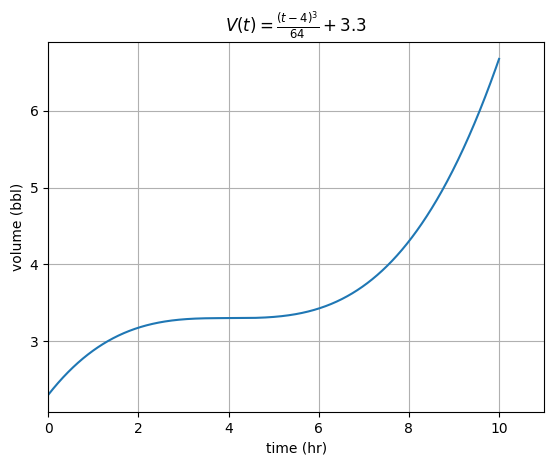

In [1]:
from plthlp import plot_function

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

plot_function(
    volume,
    tmin=0,
    tmax=10,
    tlabel="Time (hr)",
    xlabel="Volume (bbl)",
    title=volume.__doc__,
    grid=True,
)




We want to find the flow rate going through the pipe and ending up in the tank as a function of time, but we don't know how to do that yet.

As a first step, and to develop some intuition, let's write a function `average_flow_rate(v, t1, t2)` that takes a volume function `v()`, a start time `t1` and an end time `t2` and returns the average flow rate on that time interval. That is, the function will tell us the number of barrels per hour entering the tank.

### Implementing `average_flow_rate` function from a `volume` function

We want to calculate the number of "barrels per hour", which suggests we have to do some division to get our answer. Our intuition tells us that we will be able to calculate it doing:

$
\displaystyle \\
\text{average flow rate} = \frac{\text{change in volume}}{\text{elapsed time}}
$

Because we have codified the volume of oil in the tank as a function of time $ V(t) $, we can write:

$
\displaystyle \\
\text{average flow rate from } t_1 \text{ to } t_2 = \frac{V(t_2) - V(t_1)}{t_2 - t_1}
$


The same approach can be used to calculate rates of change in other context, such as the average speed provided that you have the space as a function of time.

Getting back to our oil example, we can now define a Python function that returns the `average_flow_rate()` and ask for a few values:

In [3]:
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

print(f"{volume(4)=}")
print(f"{volume(9)=}")
print(f"{average_flow_rate(volume, 4, 9)=}")


volume(4)=3.3
volume(9)=5.253125
average_flow_rate(volume, 4, 9)=0.390625


### Picturing the average flow rate with a secant line

There's a geometrically based way to think about the average rate of change in volume over time.

Let's focus on the two points on the volume graph between which we calculated the average flow rate and draw the line passing through them. This line is called the **secant line**.

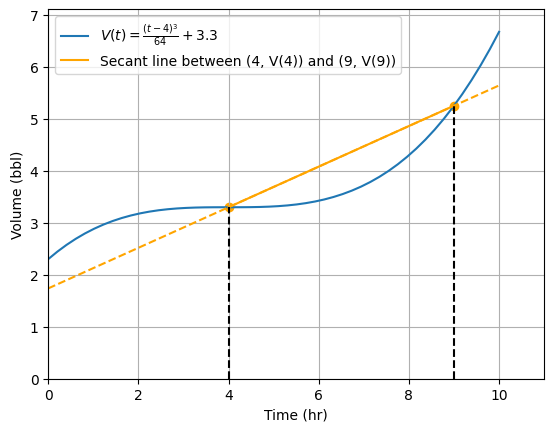

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lines import fn_std_form_line, canonical_line_coefficients

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

ts = np.linspace(0, 10)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(0, 10 + (10 - 0) * 0.1)
ax.set_ylim(0, volume(10) + (volume(10) - volume(0)) * 0.1)

fs = [volume]
fn_names = [f.__doc__ for f in fs]
for i, f in enumerate(fs):
    plt.plot(ts, f(ts), label=fn_names[i])

plt.scatter([4, 9], [volume(4), volume(9)], color="orange")
plt.plot([4, 9], [volume(4), volume(9)], color="orange", label="Secant line between (4, V(4)) and (9, V(9))")

a, b, c = canonical_line_coefficients((4, volume(4)), (9, volume(9)))
vs = fn_std_form_line(a, b, c)(ts)
plt.plot(ts, vs, linestyle="dashed", color="orange")

plt.plot([4, 4], [0, volume(4)], linestyle="dashed", color="black")
plt.plot([9, 9], [0, volume(9)], linestyle="dashed", color="black")

ax.legend()
plt.show()

We can see that the graph is higher at t = 9 thatn at t = 4 because the volume of oil in the tank increased during this period.

This makes the secant line connecting the starting and ending point to slope upward.


It turns out that there is a concept called **slope** of the secant tells us exactly what the average flow rate is on that time interval.

> Given two points on a line, the **slope** is the change in the vertical coordinate, divided by the change in the horizontal coordinate.

As the vertical coordinate goes from $ V(t_1) $ to $ V(t_2) $, and the horizontal coordinate goes from $ t_1 $ to $ t_2 $, we can say:

$
\displaystyle \text{slope } = \frac{V(t_2) - V(t_1)}{t_2 - t_1}
$

which happens to be exactly the formula for the average flow rate.

Let's develop our intuition with respect to what we've said about the slope:

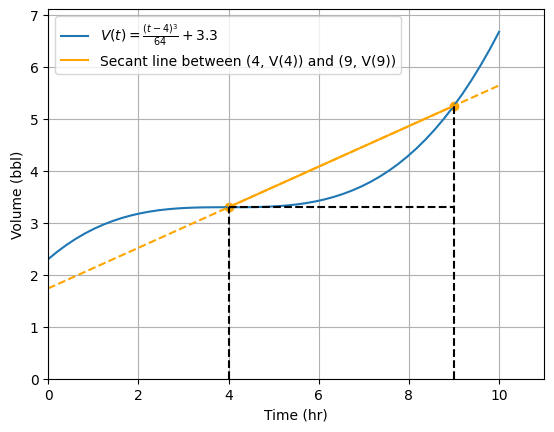

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lines import fn_std_form_line, canonical_line_coefficients

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

ts = np.linspace(0, 10)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(0, 10 + (10 - 0) * 0.1)
ax.set_ylim(0, volume(10) + (volume(10) - volume(0)) * 0.1)

fs = [volume]
fn_names = [f.__doc__ for f in fs]
for i, f in enumerate(fs):
    plt.plot(ts, f(ts), label=fn_names[i])

plt.scatter([4, 9], [volume(4), volume(9)], color="orange")
plt.plot([4, 9], [volume(4), volume(9)], color="orange", label="Secant line between (4, V(4)) and (9, V(9))")

a, b, c = canonical_line_coefficients((4, volume(4)), (9, volume(9)))
vs = fn_std_form_line(a, b, c)(ts)
plt.plot(ts, vs, linestyle="dashed", color="orange")

plt.plot([4, 4], [0, volume(4)], linestyle="dashed", color="black")
plt.plot([9, 9], [0, volume(9)], linestyle="dashed", color="black")
plt.plot([4, 9], [volume(4), volume(4)], linestyle="dashed", color="black")

ax.legend()
plt.show()

And annotated, for better clarity:

![Slope diagram (annotated)](pics/slope.png)

### Negative rates of change

A secant line can have a negative slope. The following diagram shows a different volume function that illustrates a decreasing volume in the oil tank over time.

As a result, the secant line between $ t = 0 $ and $ t = 4 $ (for example), has a negative slope.

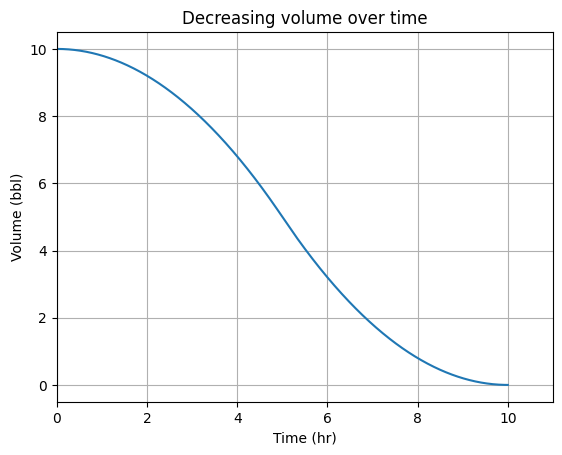

In [1]:
from plthlp import plot_function

def volume(t):
    """Decreasing volume over time"""
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2

plot_function(
    volume,
    tmin=0,
    tmax=10,
    tlabel="Time (hr)",
    xlabel="Volume (bbl)",
    title=volume.__doc__,
    grid=True,
)

And we can plot the secant between $ t = 0 $ and $ t = 4 $ and check that the slope points downward and therefore, that we have a negative rage of change.

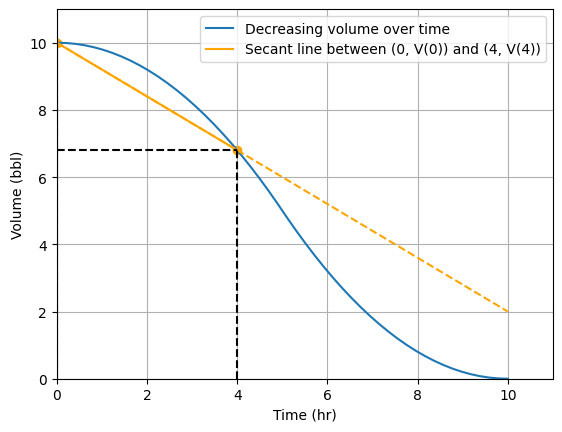

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from lines import fn_std_form_line, canonical_line_coefficients

def volume(t):
    """Decreasing volume over time"""
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2

ts = np.linspace(0, 10)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(0, 10 + (10 - 0) * 0.1)
ax.set_ylim(0, 10 + (10 - 0) * 0.1)

fs = [volume]
fn_names = [f.__doc__ for f in fs]
for i, f in enumerate(fs):
    plt.plot(ts, [f(t) for t in ts], label=fn_names[i])

plt.scatter([0, 4], [volume(0), volume(4)], color="orange")
plt.plot([0, 4], [volume(0), volume(4)], color="orange", label="Secant line between (0, V(0)) and (4, V(4))")

a, b, c = canonical_line_coefficients((0, volume(0)), (4, volume(4)))
vs = fn_std_form_line(a, b, c)(ts)
plt.plot(ts, vs, linestyle="dashed", color="orange")

plt.plot([0, 0], [0, volume(0)], linestyle="dashed", color="black")
plt.plot([4, 4], [0, volume(4)], linestyle="dashed", color="black")
plt.plot([0, 4], [volume(4), volume(4)], linestyle="dashed", color="black")

ax.legend()
plt.show()

In this case, the slope is:

$
\text{slope} = \frac{V(t_2) - V(t_1)}{t_2 - t_1} \\
= \frac{V(4) - V(0)}{4 - 0} = \frac{6.8 - 10}{4} = -0.8 \frac{bbl}{hr}
$

And because the slope happens to be the flow rate, the volume of oil in the tank is decreasing at a rate of 0.8 barrels/hr.

### Exercise

Suppose you start a road trip at noon when your odometer reads 77,641 miles, and you end your road trip at 4:30 in the afternoon with your odometer reading 77,905 miles. What was your average speed during the trip?

The speed is nothing more that the rate at which the space changes over time. Therefore:

$
\displaystyle \text{speed} = \frac{S(t_2) - S(t_1)}{t_2 - t_1} \\
= \frac{77,905 \text{ miles } - 77,641 \text{ miles}}{4.5 \text{ hours}} \\
= \frac{264 \text{ miles}}{4.5 \text{ hours}} = 58.67 \frac{miles}{hour}
$

### Exercise

Write a Python function `secant_line(f, x1, x2)` that takes a function `f(x)` and two values `x1` and `x2`, and that returns a new function representing a secant line over time.

For instance, if you ran `line = secant_line(f, x1, x2)`, then `line(3)` would give you the `y` value of the secant line at `x = 3`.

We can bank on our existing `lines` library to obtain the secant line:

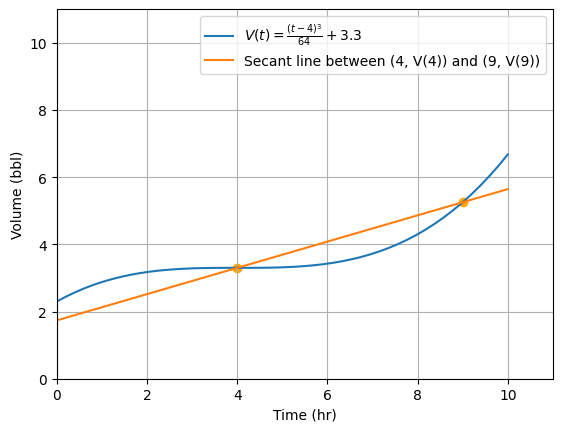

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lines import fn_std_form_line, canonical_line_coefficients


def secant_line(f, x1, x2):
    """Returns the secant line over time"""
    p1 = (x1, f(x1))
    p2 = (x2, f(x2))
    a, b, c = canonical_line_coefficients(p1, p2)
    return fn_std_form_line(a, b, c)


def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

secant = secant_line(volume, 4, 9)


ts = np.linspace(0, 10)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(0, 10 + (10 - 0) * 0.1)
ax.set_ylim(0, 10 + (10 - 0) * 0.1)

fs = [volume, secant]
fn_names = [volume.__doc__, "Secant line between (4, V(4)) and (9, V(9))"]
for i, f in enumerate(fs):
    plt.plot(ts, [f(t) for t in ts], label=fn_names[i])

plt.scatter([4, 9], [volume(4),volume(9)], color="orange")

ax.legend()
plt.show()

We can also find the secant line form algebraically without relying on the previously defined `lines` functions.

Finding the secant line between `x1` and `x2` is the same as finding the line that passes through the points `(x1, f(x1))` and `(x2, f(x2))`.

Using the parametric formula for the line:

$
\vec{r}(t) = \vec{u} + t \cdot (\vec{w} - \vec{u}) \\
(x, y) = (x1, f(x1)) + t \cdot ((x2, f(x2)) - (x1, f(x1))) \\
\begin{cases}
x = x1 + t \cdot (x2 - x1) \\
y = f(x1) + t \cdot (f(x2) - f(x1))
\end{cases}
$

Therefore:

$
\begin{cases}
t = \frac{x - x1}{x2 -x1} \\
t = \frac{y - f(x1)}{f(x2) - f(x1)}
\end{cases}
$

So:

$
\frac{x - x1}{x2 -x1} = \frac{y - f(x1)}{f(x2) - f(x1)} \\
y = \frac{(x -x1)(f(x2) - f(x1))}{x2 - x1} + f(x1) \\
$

Therefore:

$
y = f(x1) + (x - x1) \cdot \frac{f(x2) - f(x1)}{x2 - x1}
$

And repeating the exercise with this new equation should give us the same result:

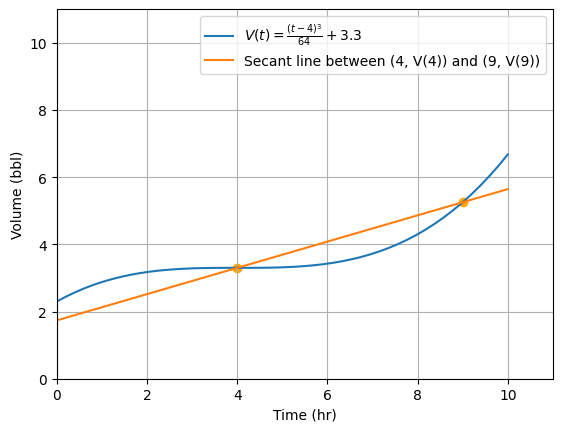

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lines import fn_std_form_line, canonical_line_coefficients


def secant_line(f, x1, x2):
    """Returns the secant line over time"""
    return lambda x: f(x1) + (x - x1) * (f(x2) - f(x1)) / (x2 - x1)


def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

secant = secant_line(volume, 4, 9)


ts = np.linspace(0, 10)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(0, 10 + (10 - 0) * 0.1)
ax.set_ylim(0, 10 + (10 - 0) * 0.1)

fs = [volume, secant]
fn_names = [volume.__doc__, "Secant line between (4, V(4)) and (9, V(9))"]
for i, f in enumerate(fs):
    plt.plot(ts, [f(t) for t in ts], label=fn_names[i])

plt.scatter([4, 9], [volume(4),volume(9)], color="orange")

ax.legend()
plt.show()

### Exercise

Write a function that uses the code from the previous exercise to plot a secant line of a function f between two given points. That is, define a function `plot_secant(f, x1, x2, color="black")`.

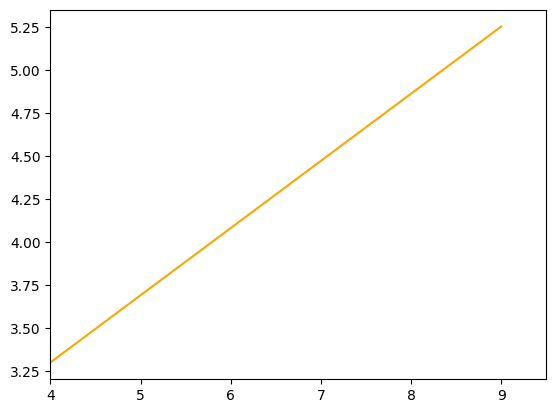

In [4]:
import matplotlib.pyplot as plt
from lines import fn_secant_line
from plthlp import plot_function

def plot_secant(f, x1, x2, color="black"):
    secant = fn_secant_line(f, x1, x2)
    plot_function(secant, tmin=x1, tmax=x2, color=color)

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

plot_secant(volume, 4, 9, color="orange")

## Plotting the average flow rate over time

To find the flow rate as a function of time, we need to ask how rapidly the volume of the tank is changing at different points in time.

Having a look at the volume over time function, and picturing the secant lines on different intervals gives us and idea about these values:

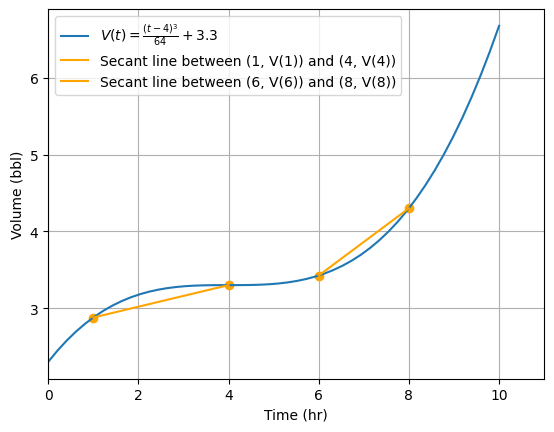

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from lines import fn_std_form_line, canonical_line_coefficients


def secant_line(f, x1, x2):
    """Returns the secant line over time"""
    return lambda x: f(x1) + (x - x1) * (f(x2) - f(x1)) / (x2 - x1)


def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

secant1 = secant_line(volume, 1, 4)
secant2 = secant_line(volume, 6, 8)


ts = np.linspace(0, 10)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(0, 10 + (10 - 0) * 0.1)


plt.plot(ts, [volume(t) for t in ts], label=volume.__doc__)
plt.plot(np.linspace(1, 4), [secant1(t) for t in np.linspace(1, 4)], label="Secant line between (1, V(1)) and (4, V(4))", color="orange")
plt.plot(np.linspace(6, 8), [secant2(t) for t in np.linspace(6, 8)], label="Secant line between (6, V(6)) and (8, V(8))", color="orange")

plt.scatter([1, 4], [volume(1),volume(4)], color="orange")
plt.scatter([6, 8], [volume(6),volume(8)], color="orange")

ax.legend()
plt.show()

By looking at the different secant lines on the volume graph we see that the flow rate is changing. In the secant to the left we see that the slope is smaller than the secant to the right, which means that that flow rate was smaller in the $ [1, 4] $ interval than it was in the $ [6, 8] $ interval.

![Different flow rates](pics/different_flow_rates.png)

Our goal is to find the average flow rate as a function of time.

We could start by breaking up the 10 hour interval in smaller intervals of a fixed duration (e.g., 1 hour intervals) and calculate the average flow rate in each one using the same approach used above for those two intervals.

Python can help us do so by defining a function `interval_flow_rates(v, t1, t2, dt)` where `v` is the volume function, `t1` and `t2` are the starting and ending time (i.e., the whole interval), and `dt` is the fixed duration of the smaller intervals in which we want to break the whole interval (e.g., 1 hour).

### Finding the average flow rate in different time intervals

The first step we need to think about for building the `interval_flow_rates()` function is delimiting the starting points for each time intervals.

That is, we need to find the list of time values ranging from `t1` to `t2` in increments of `dt`.

NumPy can help us with that with the `np.arange` function.

For example, the following snippet illustrates how to go from 0 to 10 in increments of 0.5 hours:

In [10]:
import numpy as np

np.arange(0, 10, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

Thus, `np.arange(start, end, dt)` will give us the starting points for each time intervals.

Then, we need to calculate the ending points for each time interval, but that's easier as we just need to add `dt` to each of the starting intervals:

In [12]:
import numpy as np

starting_points = np.arange(0, 10, 0.5)
ending_points = starting_points + 0.5
ending_points

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

Which means that we're in a good position now to implement the `interval_flow_rates` function:

In [14]:
import numpy as np

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    ts = np.arange(t1, t2, dt)
    return [average_flow_rate(v, t, t + dt) for t in ts]

interval_flow_rates(volume, 0, 10, 1)

[0.578125,
 0.296875,
 0.109375,
 0.015625,
 0.015625,
 0.109375,
 0.296875,
 0.578125,
 0.953125,
 1.421875]

We see that calling the function between 0 and 10 with a dt = 1 tells us the flow rate in each hour.

### Plotting the interval flow rates

With the `interval_flow_rates()` function in place, we can start thinking about plotting the values returned by that function using `scatter` to try and recreate the flow rate function over time.

Initially, it will just give us the average flow rates on the corresponding intervals:

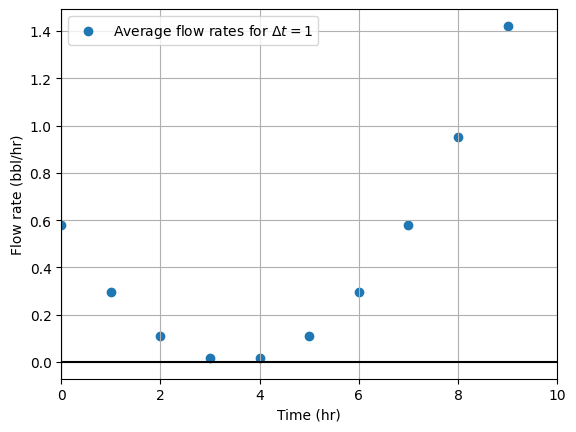

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    ts = np.arange(t1, t2, dt)
    return [average_flow_rate(v, t, t + dt) for t in ts]

def plot_interval_flow_rates(v, t1, t2, dt):
    series = interval_flow_rates(v, t1, t2, dt)
    _, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel("Time (hr)")
    ax.set_ylabel("Flow rate (bbl/hr)")
    ax.set_xlim(t1, t2)
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    plt.scatter(np.arange(t1, t2, dt), series, label=f"Average flow rates for $\\Delta t = {dt}$")
    ax.legend()
    plt.show()

plot_interval_flow_rates(volume, 0, 10, 1)

This confirms what we saw in the volume function: the volume over time function stayed almost flat around the 3 hour mark and then started increasing at a very high rate after the 6th hour (see below for reference)

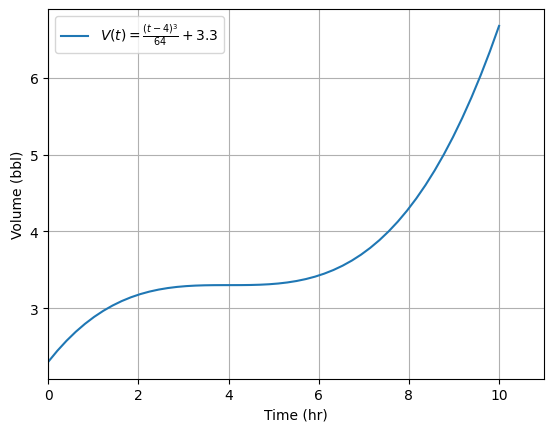

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3


ts = np.linspace(0, 10)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(0, 10 + (10 - 0) * 0.1)


plt.plot(ts, [volume(t) for t in ts], label=volume.__doc__)

ax.legend()
plt.show()

We can now go a step further and plot the actual flow rate over time function and our interval flow rates together to see the differences:

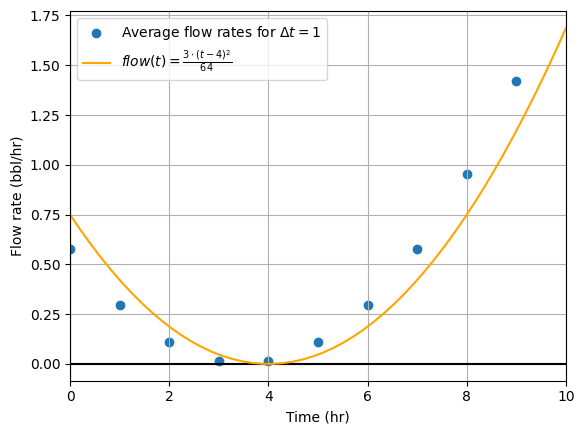

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    ts = np.arange(t1, t2, dt)
    return [average_flow_rate(v, t, t + dt) for t in ts]

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def plot_interval_flow_rates(v, t1, t2, dt):
    series = interval_flow_rates(v, t1, t2, dt)
    _, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel("Time (hr)")
    ax.set_ylabel("Flow rate (bbl/hr)")
    ax.set_xlim(t1, t2)
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    plt.scatter(np.arange(t1, t2, dt), series, label=f"Average flow rates for $\\Delta t = {dt}$")
    plt.plot(ts, [flow_rate(t) for t in ts], label=flow_rate.__doc__, color="orange")
    ax.legend()
    plt.show()

plot_interval_flow_rates(volume, 0, 10, 1)

While both plots tell the same high-level story, they do not quite line up on the details.

This happens because our scatter function is based on the average flow rates for a particular time interval, while the flow function is giving us the actual instantaneous value of the flow rate at any point in time.

You can relate to the situation if you think about what happens in a road trip. If you cover 100 km in an hour you will be doing an average speed of 100 km/hr but that doesn't mean you were doing 100 km/hr for the whole hour. You might have been doing 80 km/hr in some sections, and 120 km/hr in some others.

Similarly, the values of the flow rate meter represented by the `flow_rate(t)` function doesn't need to agree with our `average_flow_rate(t)` function.

However, if we start doing the time interval smaller, both the scatter and the smooth line start to align.

For example, if we use a dt = 20 min for our intervals:

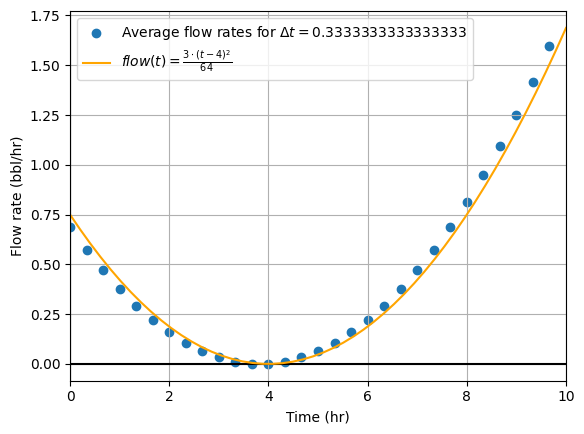

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    ts = np.arange(t1, t2, dt)
    return [average_flow_rate(v, t, t + dt) for t in ts]

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def plot_interval_flow_rates(v, t1, t2, dt):
    series = interval_flow_rates(v, t1, t2, dt)
    _, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel("Time (hr)")
    ax.set_ylabel("Flow rate (bbl/hr)")
    ax.set_xlim(t1, t2)
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    plt.scatter(np.arange(t1, t2, dt), series, label=f"Average flow rates for $\\Delta t = {dt}$")
    plt.plot(ts, [flow_rate(t) for t in ts], label=flow_rate.__doc__, color="orange")
    ax.legend()
    plt.show()

plot_interval_flow_rates(volume, 0, 10, 1/3)

This starts to give us the feeling that if we make the intervals small enough, we will be able to reproduce the instantaneous flow rate with the sufficient level of approximation.

### Exercises

Plot the `decreasing_volume` flow rate over time at 0.5 hour interval. When is its flow rate the lowest? That is, when is oil leaving the tank at the fastest rate?

We just need to use the same code we used earlier, this time changing the definition of the volume function:

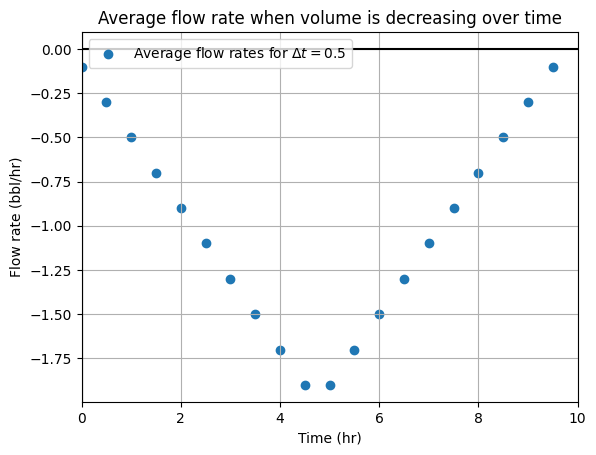

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """$ \\begin{cases} 10 - \\frac{t^2}{5} & \\text{if } t < 5 \\\\ 0.2 \\cdot (10 - t)^2 & \\text{if } t \\geq 5 \\end{cases}"""
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    ts = np.arange(t1, t2, dt)
    return [average_flow_rate(v, t, t + dt) for t in ts]

def plot_interval_flow_rates(v, t1, t2, dt):
    series = interval_flow_rates(v, t1, t2, dt)
    _, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel("Time (hr)")
    ax.set_ylabel("Flow rate (bbl/hr)")
    ax.set_xlim(t1, t2)
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    plt.scatter(np.arange(t1, t2, dt), series, label=f"Average flow rates for $\\Delta t = {dt}$")
    ax.legend()

    plt.title("Average flow rate when volume is decreasing over time")
    plt.show()

plot_interval_flow_rates(volume, 0, 10, 0.5)

It's a good idea to also plot the volume function, so that we can check our answers:

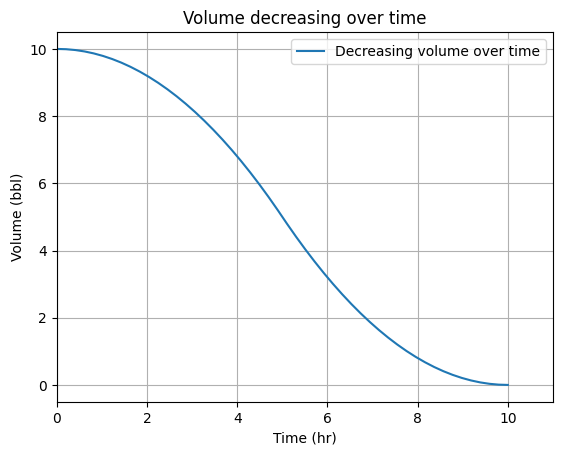

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """Decreasing volume over time"""
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2


ts = np.linspace(0, 10)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(0, 10 + (10 - 0) * 0.1)


plt.plot(ts, [volume(t) for t in ts], label=volume.__doc__)

ax.legend()

plt.title("Volume decreasing over time")
plt.show()

We need to answer the question: When is its flow rate the lowest? That is, when is oil leaving the tank at the fastest rate?

Because the flow rate is derive from the slope of the function, we can say that the lowest flow rate will happen around the 5th hour, because it is when the slope is is more steep pointing downwards.

Our picture of the average flow rate demonstrates it as the average flow rate is around 2 at that time.

### Exercise

Write a `linear_volume_function` and plot the flow rate over time to show that it is constant.

In this exercise, instead of having a fancy curve for the volume of oil over the time in a tank, we have to use something like $ v(t) = a \cdot t + b $, which is a straight line.

Because in a straight line, the rate of change (aka the slope), is constant, the corresponding graph for the average flow rate should be constant too.

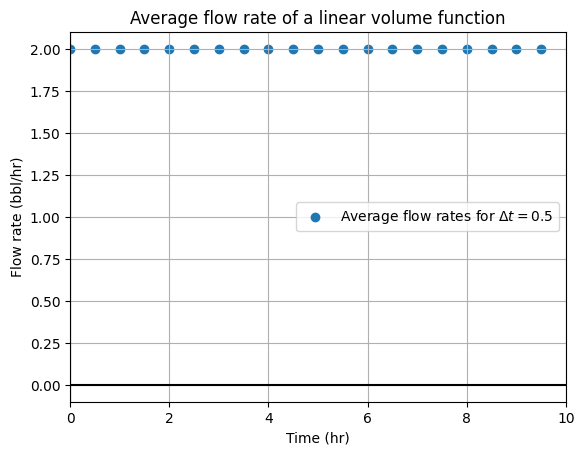

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """$ V(t) = 2 \\cdot t + 5 $"""
    return 2 * t + 5

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    ts = np.arange(t1, t2, dt)
    return [average_flow_rate(v, t, t + dt) for t in ts]

def plot_interval_flow_rates(v, t1, t2, dt):
    series = interval_flow_rates(v, t1, t2, dt)
    _, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel("Time (hr)")
    ax.set_ylabel("Flow rate (bbl/hr)")
    ax.set_xlim(t1, t2)
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    plt.scatter(np.arange(t1, t2, dt), series, label=f"Average flow rates for $\\Delta t = {dt}$")
    ax.legend()

    plt.title("Average flow rate of a linear volume function")
    plt.show()

plot_interval_flow_rates(volume, 0, 10, 0.5)

We can picture the volume too:

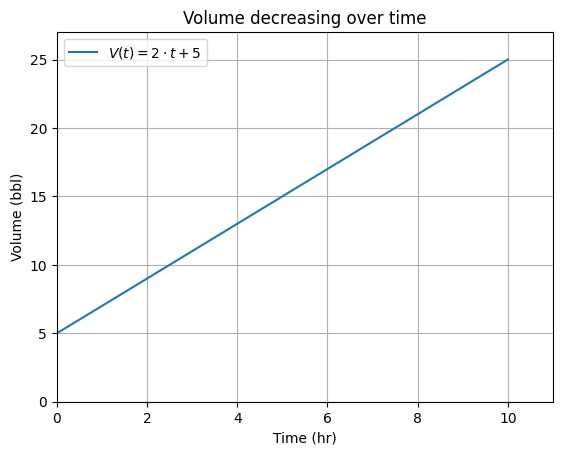

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """$ V(t) = 2 \\cdot t + 5 $"""
    return 2 * t + 5


ts = np.linspace(0, 10)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(0, 10 + (10 - 0) * 0.1)
ax.set_ylim(0, volume(10) + (volume(10) - volume(0)) * 0.1)


plt.plot(ts, [volume(t) for t in ts], label=volume.__doc__)

ax.legend()

plt.title("Volume decreasing over time")
plt.show()

We see that the slope of a straight line is always the same.

We can manually calculate the slope and check it matches our plot:


$
\displaystyle \text{slope } = \text{average flow rate between } t_2 \text{ and } t_1 = \frac{V(t_2) - V(t_1)}{t_2 - t_1} \\
= \frac{V(10) - V(0)}{10 - 0} = \frac{25 - 5}{10} = 2 \; bbl/hr
$


### Approximating instantaneous flow rates

As we calculate the average rate of change of our volume over time function over smaller and smaller time intervals, we get closer and closer to the real flow rate over time function.

Note however, that if we use our average flow rate formula for a single time instance $ t $, we'll run into trouble:

$
\displaystyle \text{average flow rate at t} = \frac{V(t) - V(t)}{t - t} = \frac{0}{0}
$

Dividing 0/0 is undefined, so we need help from calculus to obtain the flow rate at a given instant: the *derivative*.

In this section, we'll write a function `instantaneous_flow_rate(v, t)` that takes a volume function $ v $ and a single point in time $ t $, and returns an approximation of the instantaneous rate at which oil is flowing into the tank at time $ t $.

With that function in place, it'll be easy to define another function `get_flow_rate_fn(v)` which will return the function that we could use to plot the flow rate.

### Finding the slope of small secant lines

Let's develop some intuition about what we mean by instantaneous flow rate, and how we can calculate it.

Let's start by plotting our volume function and then picking up a particular point, for example $ t = 1 $.

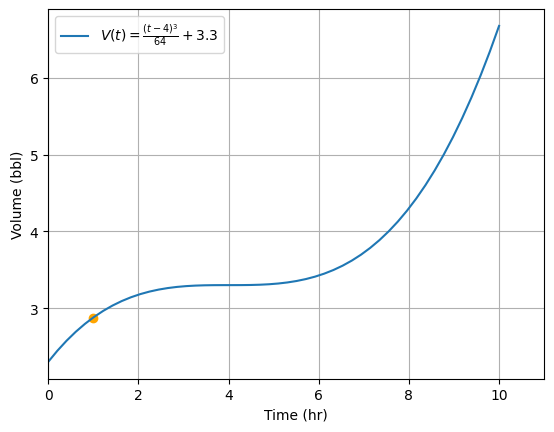

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3


ts = np.linspace(0, 10)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(0, 10 + (10 - 0) * 0.1)

ax.scatter([1], [volume(1)], color="orange")
ax.plot(ts, [volume(t) for t in ts], label=volume.__doc__)


ax.legend()
plt.show()

Let's set up now a smaller window around $ t = 1 $ and see how our function looks:

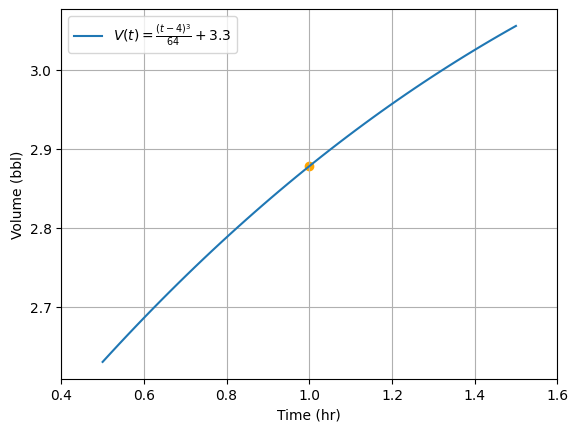

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

t_min = 0.5
t_max = 1.5

ts = np.linspace(t_min, t_max)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.scatter([1], [volume(1)], color="orange")
ax.plot(ts, [volume(t) for t in ts], label=volume.__doc__)


ax.legend()
plt.show()

Note how in this smaller interval $ [0.5, 1.5] $ we no longer see much of the curviness of the function. This means that the steepness of the graph has less variability than in the 10-hour window.

We can appreciate this more clearly by plotting the secant lines between $ [0.5, 1] $ and $ [1, 1.5] $.

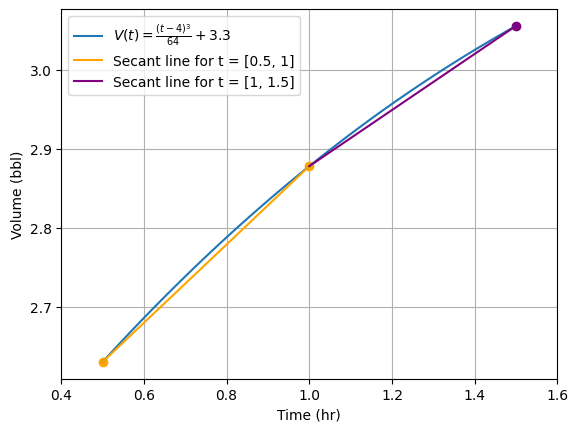

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

t_min = 0.5
t_max = 1.5

ts = np.linspace(t_min, t_max)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.scatter([1], [volume(1)], color="orange")
ax.plot(ts, [volume(t) for t in ts], label=volume.__doc__)

# secant line between 0.5 and 1
ax.plot([0.5, 1], [volume(0.5), volume(1)], color="orange", label="Secant line for t = [0.5, 1]")
ax.scatter([0.5], [volume(0.5)], color="orange")

# secant line between 1 and 1.5
ax.plot([1, 1.5], [volume(1), volume(1.5)], color="purple", label="Secant line for t = [1, 1.5]")
ax.scatter([1.5], [volume(1.5)], color="purple")

ax.legend()
plt.show()

We can see that both secant lines have similar slopes, meaning that the flow rate doesn't change much during that interval.

If we zoom even further, the steepness of the graph will look more and more constant.

Let's repeat the same graph for the interval between 0.9 and 1.1.

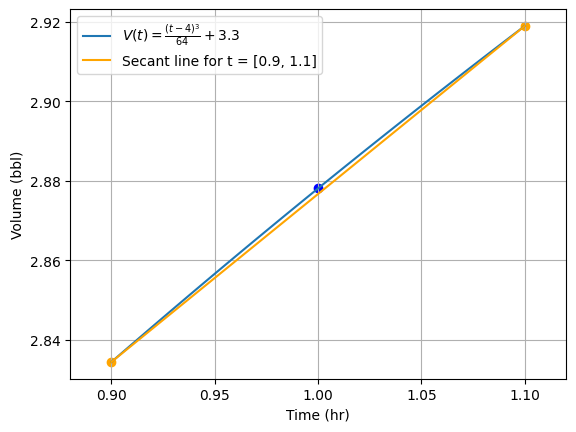

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

t_min = 0.9
t_max = 1.1
x_mid = 1

ts = np.linspace(t_min, t_max)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.scatter([x_mid], [volume(x_mid)], color="blue")
ax.plot(ts, [volume(t) for t in ts], label=volume.__doc__)

# secant line between x_min and x_max
ax.plot([t_min, t_max], [volume(t_min), volume(t_max)], color="orange", label=f"Secant line for t = [{t_min}, {t_max}]")
ax.scatter([t_min, t_max], [volume(t_min), volume(t_max)], color="orange")


ax.legend()
plt.show()

Now the volume graph is almost a straight line, and the secant line almost doesn't let you see the volume graph.

If we zoom in even further between 0.99 and 1.01, the volume graph becomes indistiguishable from a straight line, and the secant completely shadows the volume graph below:

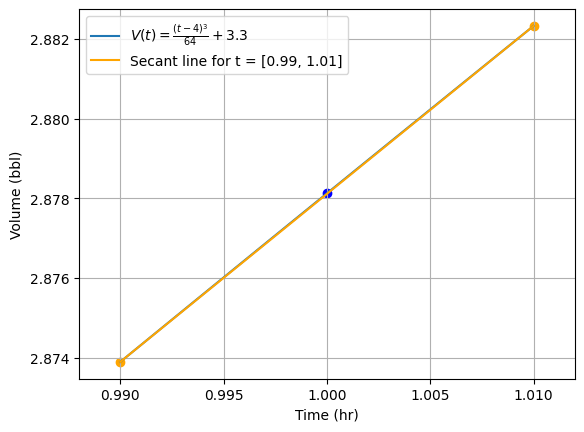

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

t_min = 0.99
t_max = 1.01
x_mid = 1

ts = np.linspace(t_min, t_max)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.scatter([x_mid], [volume(x_mid)], color="blue")
ax.plot(ts, [volume(t) for t in ts], label=volume.__doc__)

# secant line between x_min and x_max
ax.plot([t_min, t_max], [volume(t_min), volume(t_max)], color="orange", label=f"Secant line for t = [{t_min}, {t_max}]")
ax.scatter([t_min, t_max], [volume(t_min), volume(t_max)], color="orange")


ax.legend()
plt.show()

If you keep zooming, the graph continues to look line.

Note that it's not that the graph is a line at this point: it is that it gets closer and closer to looking like a line.

The leap in reasoning that we can make in calculus is that there's a single, best line approximating a smooth graph (like our volume graph).

We say that the slopes of smaller and smaller secant lines **converge** to a single value, suggesting that we are approaching a single "best" approximation for the slope, and therefore, for the instantaneous flow rate at that point:

In [20]:
def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

print(f"{average_flow_rate(volume, 0.5, 1.5)=}")
print(f"{average_flow_rate(volume, 0.75, 1.25)=}")
print(f"{average_flow_rate(volume, 0.9, 1.1)=}")
print(f"{average_flow_rate(volume, 0.99, 1.01)=}")
print(f"{average_flow_rate(volume, 0.999, 1.001)=}")
print(f"{average_flow_rate(volume, 0.9999, 1.0001)=}")
print(f"{average_flow_rate(volume, 0.99999, 1.00001)=}")

average_flow_rate(volume, 0.5, 1.5)=0.42578125
average_flow_rate(volume, 0.75, 1.25)=0.4228515625
average_flow_rate(volume, 0.9, 1.1)=0.4220312499999988
average_flow_rate(volume, 0.99, 1.01)=0.42187656249998945
average_flow_rate(volume, 0.999, 1.001)=0.42187501562509583
average_flow_rate(volume, 0.9999, 1.0001)=0.42187500015393936
average_flow_rate(volume, 0.99999, 1.00001)=0.4218750000002602


Thus, it looks like the number we're approaching for the instantanous rate flow at $ t = 1 $ is 0.421875.

We can conclude that:
> the line of best approximation for the volume function at the point $ t = 1 $ has a slope of 0.421875.

If we zoom out again and plot the line with slope 0.421875 we see that it lies flat on the point `(1, volume(1))`.

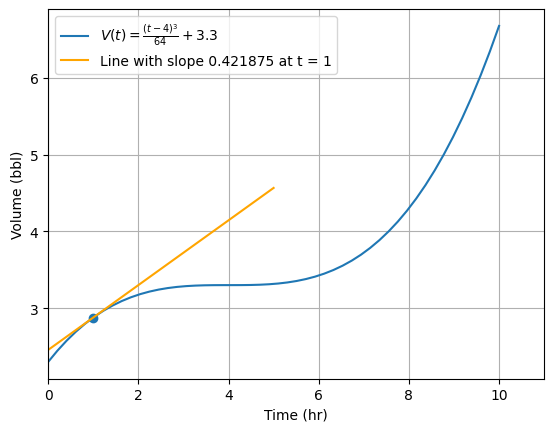

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

t_min = 0
t_max = 10
t_instant = 1

ts = np.linspace(t_min, t_max)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(t_min, t_max + (t_max - t_min) * 0.1)

ax.scatter([t_instant], [volume(t_instant)], color="C0")
ax.plot(ts, [volume(t) for t in ts], label=volume.__doc__)


def tangent_line(t):
    """Tangent line for t = 1"""
    return 0.421875 * t + (volume(1) - 0.421875)


ax.plot([0, 5], [tangent_line(0), tangent_line(5)], color="orange", label=f"Line with slope 0.421875 at t = 1")
# ax.scatter([t_min, t_max], [volume(t_min), volume(t_max)], color="orange")


ax.legend()
plt.show()

This line is called the tangent line to the volume graph at the point t = 1, and it's distinguished by the fact that it lies flat against the volume graph at that point.

Because the tangent line is the line that best approximates the volume graph, its slope is the best measure of the instantaneous slope of that graph, and therefore, the instantaneous flow rate at t = 1.

We can validate it by comparing with the *"actual"* flow rate function computed through the derivative:

In [26]:
def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

flow_rate(1)

0.421875

Which gives us the exact same value we calculated.

To have a tangent line, a function needs to be smooth. If a function is not smooth, it won't have a line of best approximation.

When we can find a tangent line to the graph of a function at a point, its slope is called the derivative of the function at the point.

This means that the derivative of the volume function at the point t = 1 is equal to 0.421875 barrels per hour.

### Building the instantaneous flow rate function

We've seen how to calculate instantaneous rates of change of the volume function, so the natural next step will be to implement the `instantaneous_flow_rate` function.

There's one major obstacle though: Python can't find what's the number the different small secants are converging to as we do.

To get around this, we need to calculate slopes of smaller and smaller secant lines until they stabilize to certain fixed number of digits.

For example, we could establish the following rules:
+ Each interval will be tenth as wide as the previous.
+ We will stop when the values stabilize to four decimal places.

Thus, for our previous example, we can try with this naive approach:

In [11]:
from math import isclose

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

done = False
prev = 9E99 # infinity
t = 1
i = 0
while not done:
    t_min = t - 1 / (2 * (10 ** i))
    t_max = t + 1 / (2 * (10 ** i))
    val = average_flow_rate(volume, t_min, t_max)
    print(f"{(i + 1)}: {t_min=}, {t_max=}, {val=}")
    done = isclose(val, prev, rel_tol=1e-5) or (i == 10)
    i += 1
    prev = val

1: t_min=0.5, t_max=1.5, val=0.42578125
2: t_min=0.95, t_max=1.05, val=0.4219140624999969
3: t_min=0.995, t_max=1.005, val=0.42187539062501933
4: t_min=0.9995, t_max=1.0005, val=0.4218750039060491


In the last two computations, the slopes agree to four decimal places by less than $ 10^{-4} $, to a value of 0.4219 (with rounding).

We can now define the `instantaneous_flow_rate(v, t, digits)` function with a more robust approach than before. Note that we need to include a guardrail: if after some large number of steps, we still haven't converged to the desired number of digits, we should stop and raise an exception to inform that the derivative did not converge:

In [12]:
def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

def instantaneous_flow_rate(v, t, digits=6):
    tolerance = 10 ** -digits
    h = 1
    approx = average_flow_rate(v, t - h, t + h)
    for _ in range(2 * digits):
        h /= 10
        next_approx = average_flow_rate(v, t - h, t + h)
        if abs(next_approx - approx) < tolerance:
            return round(next_approx, digits)
        else:
            approx = next_approx
    raise Exception("Derivative did not converge")

instantaneous_flow_rate(volume, 1)

0.421875

We now have the tools to compute the instantaneous flow rate at any point in time, which means we have the complete data of the flow rate function.

We can now plot it and confirm it matches the real flow rate function computed with the derivative formula of the volume function, instead of from the approximation.

### Currying and plotting the instantaneous flow rate function

Let's define a *curried* function that takes a volume function `v` and returns the flow rate function over time:

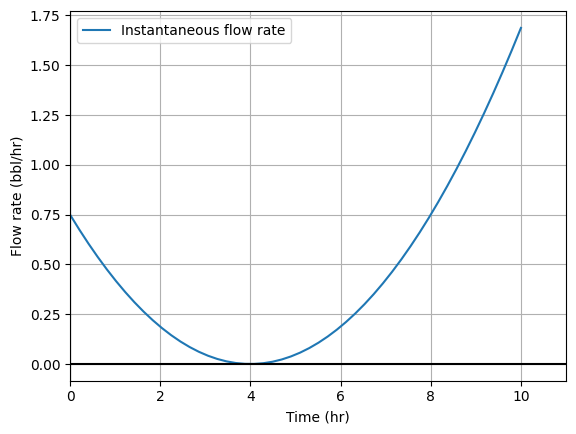

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

def instantaneous_flow_rate(v, t, digits=6):
    tolerance = 10 ** -digits
    h = 1
    approx = average_flow_rate(v, t - h, t + h)
    for _ in range(2 * digits):
        h /= 10
        next_approx = average_flow_rate(v, t - h, t + h)
        if abs(next_approx - approx) < tolerance:
            return round(next_approx, digits)
        else:
            approx = next_approx
    raise Exception("Derivative did not converge")

def get_flow_rate_function(v):
    return lambda t: instantaneous_flow_rate(v, t)

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

flow_rate = get_flow_rate_function(volume)

t_min = 0
t_max = 10

ts = np.linspace(t_min, t_max)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Flow rate (bbl/hr)")
ax.set_xlim(t_min, t_max + (t_max - t_min) * 0.1)

ax.plot(ts, [flow_rate(t) for t in ts], label="Instantaneous flow rate")

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

ax.legend()
plt.show()

Finally, we've been able to produce the flow rate function given the volume function. This procedure is called *taking a derivative*.

Given a function like the `volume` function, another function giving its instantaneous rate of change at any given point is called its **derivative**.

As a mental model, you can think of the derivative as an operation that takes one (sufficiently smooth) function and returns another function measuring the rate of change of the original.

Thus we can say that the flow rate function is the derivative of the volume function.

![Derivative](pics/derivative.png)

The derivative is a general procedure that works on any function $ f(x) $ which is smooth enough to have a tangent at every point.

The derivative of a function $ f $ is written as:

$
\displaystyle f'(x) = \frac{df}{dx} = \frac{d}{dx}f(x)
$

The $ df $ and $ dx $ are used to express infinitesimal small changes in $ f $ and $ x $ respectively, and their quotient gives us the slope of an infinitesimal secant line, because as we recall:

$
\text{slope of the secant line} = \frac{f(x_2) - f(x_1)}{x_2 - x_1}
$

And therefore, if we make the difference between $ x_2 $ and $ x_1 $ infinitesimal, we get the derivative.

### Exercise

Confirm that the graph of the volume function is not a straight line on the interval $ 0.999 $ to $ 1.001 $ hours.

On the one hand, we have the `volume` function, and on the other we can calculate the formula for the straight line between $ 0.999 $ and $ 1.001 $. We can then compare both and check they're similar but not equal.

In [1]:
from lines import canonical_line_coefficients, fn_std_form_line
import numpy as np

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

t_min = 0.999
t_max = 1.001

straight_line_fn = fn_std_form_line(*canonical_line_coefficients(p1=(t_min, volume(t_min)), p2=(t_max, volume(t_max))))

ts = np.linspace(t_min, t_max, 10)
diffs = [volume(t) - straight_line_fn(t) for t in ts]
for t, diff in zip(ts, diffs):
    print(f"{t=}, {diff=}")



t=0.999, diff=6.705747068735946e-14
t=0.9992222222222222, diff=5.556042381726911e-08
t=0.9994444444444445, diff=9.722829075187178e-08
t=0.9996666666666666, diff=1.250046963718887e-07
t=0.9998888888888888, diff=1.3889067096428676e-07
t=1.000111111111111, diff=1.3888724126331908e-07
t=1.0003333333333333, diff=1.2499543755595255e-07
t=1.0005555555555554, diff=9.721628835279716e-08
t=1.0007777777777778, diff=5.555082172037373e-08
t=1.001, diff=6.705747068735946e-14


While small, there are differences.

In particular, for t = 1:

In [2]:
from lines import canonical_line_coefficients, fn_std_form_line

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

t_min = 0.999
t_max = 1.001

straight_line_fn = fn_std_form_line(*canonical_line_coefficients(p1=(t_min, volume(t_min)), p2=(t_max, volume(t_max))))

print(f"{straight_line_fn(1)=}, {volume(1)=}")


straight_line_fn(1)=2.8781248593749327, volume(1)=2.878125


### Exercise

Approximate the slope of a tangent line to the volume graph at $ t = 8 $ by computing the slopes of smaller and smaller secant lines around $ t = 8 $.

We can use both our naive and robust approach and check the results match:

In [3]:
from math import isclose

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

done = False
prev = 9E99 # infinity
t = 8
i = 0
while not done:
    t_min = t - 1 / (2 * (10 ** i))
    t_max = t + 1 / (2 * (10 ** i))
    val = average_flow_rate(volume, t_min, t_max)
    print(f"{(i + 1)}: {t_min=}, {t_max=}, {val=}")
    done = isclose(val, prev, rel_tol=1e-5) or (i == 10)
    i += 1
    prev = val

1: t_min=7.5, t_max=8.5, val=0.75390625
2: t_min=7.95, t_max=8.05, val=0.7500390624999969
3: t_min=7.995, t_max=8.005, val=0.7500003906250212
4: t_min=7.9995, t_max=8.0005, val=0.7500000039068748


In [4]:
def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

def instantaneous_flow_rate(v, t, digits=6):
    tolerance = 10 ** -digits
    h = 1
    approx = average_flow_rate(v, t - h, t + h)
    for _ in range(2 * digits):
        h /= 10
        next_approx = average_flow_rate(v, t - h, t + h)
        if abs(next_approx - approx) < tolerance:
            return round(next_approx, digits)
        else:
            approx = next_approx
    raise Exception("Derivative did not converge")

instantaneous_flow_rate(volume, 8)

0.75

In both cases, we get 0.75 bbl/hr.

### Exercise

For the `sign` function defined in Python, convince yourself that it doesn't have a derivative at $ x = 0 $.

The function won't have a derivative if it isn't smooth enough to have a tangent line at every point. Thus, if `sign` doesn't have a derivative at $ x = 0 $ it has to be because it is isn't smooth enough to have a tangent around $ x = 0 $.

Let's start by plotting it:

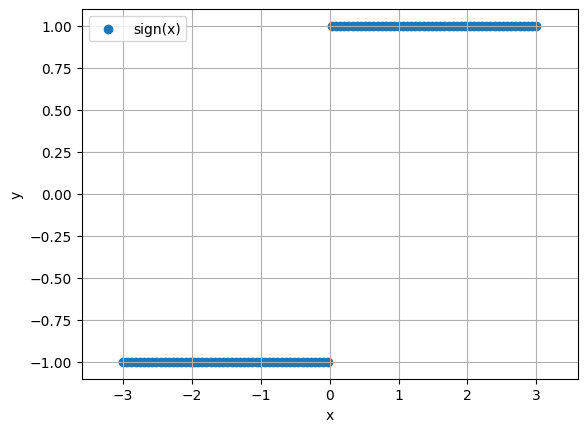

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sign(x):
    return x / abs(x)

x_min = -3
x_max = 3
x = 0

xs = np.linspace(x_min, x_max, 100)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(x_min - (x_max - x_min) * 0.1, x_max + (x_max - x_min) * 0.1)

ax.scatter(xs, [sign(x) for x in xs], label="sign(x)")

ax.legend()
plt.show()

We see that the function is not smooth around zero, but let's validate it with our `instantaneous_flow_rate`:

In [12]:
def sign(x):
    return x / abs(x)

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

def instantaneous_flow_rate(v, t, digits=6):
    tolerance = 10 ** -digits
    h = 1
    approx = average_flow_rate(v, t - h, t + h)
    for _ in range(2 * digits):
        h /= 10
        next_approx = average_flow_rate(v, t - h, t + h)
        if abs(next_approx - approx) < tolerance:
            return round(next_approx, digits)
        else:
            approx = next_approx
    raise Exception("Derivative did not converge")

try:
    instantaneous_flow_rate(sign, 0)
except Exception as e:
    print(e)

Derivative did not converge


From the intuition we developed in the concepts section, we see that the function is not smooth because when zooming on it, it doesn't look like a straight line as it happened with the `volume` function.

## Approximating the change in volume

In this section we will deal with the opposite situation: given a known flow rate function, recover the volume function.

This is the reverse of finding the derivative, and in calculus this is known as **integration**.

We will start by developing our intuition about what integration means with a few simple examples.

For the first example, we will write a few Python functions to help us find the change in volume in the tank over a specified period of time.

The first function will be:

```python
brief_volume_change(q, t, dt)
```

The function takes a flow rate function `q`, a time instant `t`, and a short time duration `dt`, and it will return the approximate change in volume from time $ t $ to time $ t + dt $.

This function will calculate the result by assuming that the time interval is so short that the flow rate does not change by much.

The second function will be:

```python
volume_change(q, t1, t2, dt)
```

We will use this function to calculate the volume change on any time interval given the flow rate function `q`, a start time `t1`, an end time `t2`, and a small time interval `dt`.

This function will calculate the volume change by breaking the time interval into increments of duration `dt`, which will be short enough to use the `brief_volume_change` function. That is, the function will return the sum of all the volume changes in those tiny time intervals.

### Finding the change in volume for a short time interval

To get a sense of what we need to do in `brief_volume_change`, let's go back to our car example. If you glance at your speedometer and it reads exactly 60 km/h, you might predict that in the next two hours you'll travel 120 km, which happens to be $ 60 \; \frac{km}{h} \times 2 \; h = 120 \; km $.

However, it's more than possible that it won't be impossible to maintain the speed at 60 km/h, so the estimate won't be accurate to estimate the distanve traveled over a long period.

However, if you used the same approach to calculate how far you traveled in a single second, you'd probably get a very accurate answer, because your speed won't change much on that second.

Returning to flow rates, if we assume that we're working with a short enough duration, so that the flow rate is roughly constant, then we can assume that the instant flow rate will be approximately the average flow rate:

$
\displaystyle \text{instant flow rate} \approx \text{average flow rate} = \frac{\text{change in volume}}{\text{elapsed time}}
$

If we rearrange the previous formula, we get to:

$
\displaystyle \text{change in volume} \approx \text{instant flow rate} \times \text{elapsed time}
$

Thus, we can get our implementation for the `brief_volume_change`:

In [ ]:
def brief_volume_change(q, t, dt):
    return q(t) * dt

Because we have an actual pair of `volume` and `flow_rate` functions, we can test how good our `brief_volume_change` is for large and small values of `dt`.

In [2]:
def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def brief_volume_change(q, t, dt):
    return q(t) * dt

print(f"{brief_volume_change(flow_rate, 2, 1)=}; real volume change={volume(3) - volume(2)}")

brief_volume_change(flow_rate, 2, 1)=0.1875; real volume change=0.109375


We see that there's a huge difference for the interval that goes from $ t = 2 h $ to $ t = 3 h $. That is consistent with the car example.

However, if we do the same for a small interval:

In [3]:
def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def brief_volume_change(q, t, dt):
    return q(t) * dt

print(f"{brief_volume_change(flow_rate, 2, 0.01)=}; real volume change={volume(2.01) - volume(2)}")

brief_volume_change(flow_rate, 2, 0.01)=0.001875; real volume change=0.0018656406250001645


Now the approximation is much better, because we used a smaller interval in which the flow rate didn't change that much.

### Breaking up time into smaller intervals

Now, we need to think about how to implement the function `volume_change(q, t1, t2, dt)` with the `brief_volume_change(q, t, dt)` in place.

The first thing will be to split the time between `t1` and `t2` into intervals of `dt` duration. For simplicity, we'll only handle values of `dt` that evenly divide `t2 - t1`, so that we end up with a whole number of splits.

The function `np.arange(t1, t2, dt)` does just that:

In [1]:
import numpy as np

np.arange(5, 10, 0.5)

array([5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

Note that `t2` is omitted.

Finally, to get the total volume change we just need to sum the *brief* volume changes.

We can also check how good our approximation is by getting the real and calculated through `volume_change` values for the interval that goes from `t1 = 0` to `t2 = 10`, with `dt = 0.1`

In [3]:
import numpy as np

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def brief_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(brief_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

print(f"{volume_change(flow_rate, 0, 10, 0.1)=}; real volume change={volume(10) - volume(0)}")

volume_change(flow_rate, 0, 10, 0.1)=4.32890625; real volume change=4.375


And as we expect, if we split the interval into smaller intervals the approximation will get better and better:

In [6]:
import numpy as np

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def brief_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(brief_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

print(f"{volume_change(flow_rate, 0, 10, 0.01)=}; real volume change={volume(10) - volume(0)}")
print(f"{volume_change(flow_rate, 0, 10, 0.001)=}; real volume change={volume(10) - volume(0)}")
print(f"{volume_change(flow_rate, 0, 10, 0.0001)=}; real volume change={volume(10) - volume(0)}")

volume_change(flow_rate, 0, 10, 0.01)=4.370320312500006; real volume change=4.375
volume_change(flow_rate, 0, 10, 0.001)=4.374531328124998; real volume change=4.375
volume_change(flow_rate, 0, 10, 0.0001)=4.3749531257812455; real volume change=4.375


### Picturing the volume change on the flow rate graph

Let's suppose we're breaking the 10-hr period into 1-hr intervals.

Let's start by plotting the flow rate function and the points we'll use to calculate the volume change:

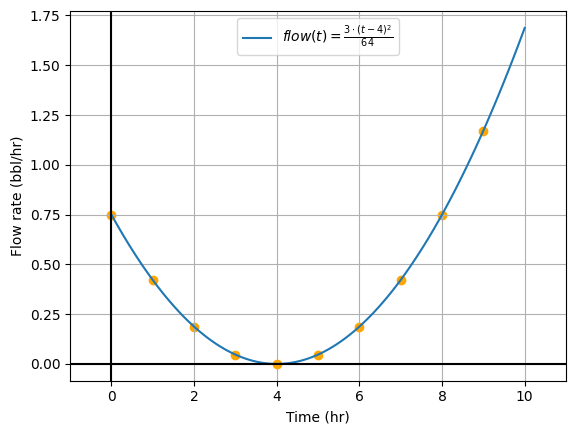

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

t_min = 0
t_max = 10


ts = np.linspace(t_min, t_max, 100)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Flow rate (bbl/hr)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.plot(ts, [flow_rate(t) for t in ts], label=flow_rate.__doc__)
ax.scatter(np.arange(t_min, t_max, 1), [flow_rate(t) for t in np.arange(t_min, t_max, 1)], color="orange")

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")


ax.legend()
plt.show()

Our calculation method for `volume_change` is based on `brief_volume_change`, which assumes that the flow rates between `t` and `dt` remained constant, which is clearly not the case for any of the orange points in the plot.

Actually, for our approximation, it is as if we were working with a different flow rate function whose graph is constant during every hour as depicted below:

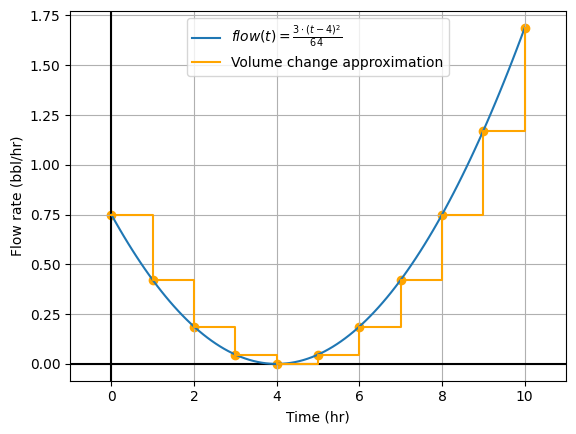

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

t_min = 0
t_max = 10


ts = np.linspace(t_min, t_max, 100)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Flow rate (bbl/hr)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

ax.plot(ts, [flow_rate(t) for t in ts], label=flow_rate.__doc__)
ax.scatter(np.arange(t_min, t_max + 1, 1), [flow_rate(t) for t in np.arange(t_min, t_max + 1, 1)], color="orange")

interval_points = np.arange(t_min, t_max + 1, 1)
ts = []
qs = []
for i in range(interval_points.size - 1):
    ts.extend([interval_points[i], interval_points[i + 1]])
    qs.extend([flow_rate(interval_points[i]), flow_rate(interval_points[i])])

ts.append(interval_points[-1])
qs.append(flow_rate(interval_points[-1]))

ax.plot(ts, qs, color="orange", label="Volume change approximation")

ax.legend()
plt.show()

In each interval, we calculate the flow rate (which happens to be the height of each flat graph segment) times the elapsed time of 1 hr (which is the width of each graph segment).

In essence, what the `volume_change` will be doing is calculating the area under the volume change approximation function, and because the approximation function assumes a constant flow rate from the beginning to the end of the intervals, that area is just the sum of the area of the rectangles depicted below.

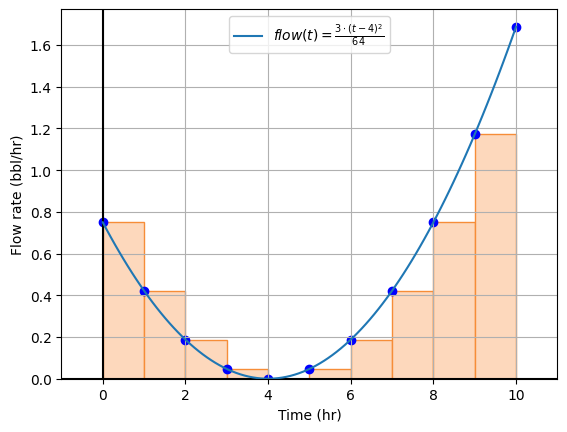

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

t_min = 0
t_max = 10


ts = np.linspace(t_min, t_max, 100)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Flow rate (bbl/hr)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

t_left_edges = np.arange(t_min, t_max)
q_heights = [flow_rate(t) for t in t_left_edges]

plt.bar(t_left_edges, q_heights, align="edge", width=1, color="#FDD8BC", edgecolor="#F68D38")
ax.plot(ts, [flow_rate(t) for t in ts], label=flow_rate.__doc__)
ax.scatter(np.arange(t_min, t_max + 1, 1), [flow_rate(t) for t in np.arange(t_min, t_max + 1, 1)], color="blue")


ax.legend()
plt.show()

As we shorten the time intervals, our approximation function will be closer to the real flow rate function, and as a result, the volume as the sum of the area of the rectangles will be closer to the real volume function.

For example, if we use 30 rectangles instead of 10:

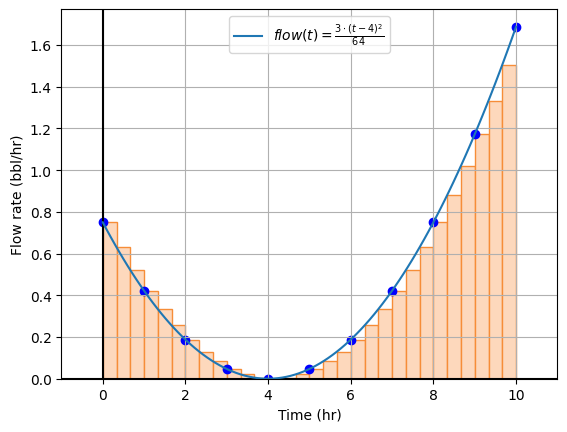

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

t_min = 0
t_max = 10


ts = np.linspace(t_min, t_max, 100)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Flow rate (bbl/hr)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

t_left_edges = np.arange(t_min, t_max, step = 1 / 3)
q_heights = [flow_rate(t) for t in t_left_edges]

plt.bar(t_left_edges, q_heights, align="edge", width=1 / 3, color="#FDD8BC", edgecolor="#F68D38")
ax.plot(ts, [flow_rate(t) for t in ts], label=flow_rate.__doc__)
ax.scatter(np.arange(t_min, t_max + 1, 1), [flow_rate(t) for t in np.arange(t_min, t_max + 1, 1)], color="blue")


ax.legend()
plt.show()

And if we use 100 rectangles:

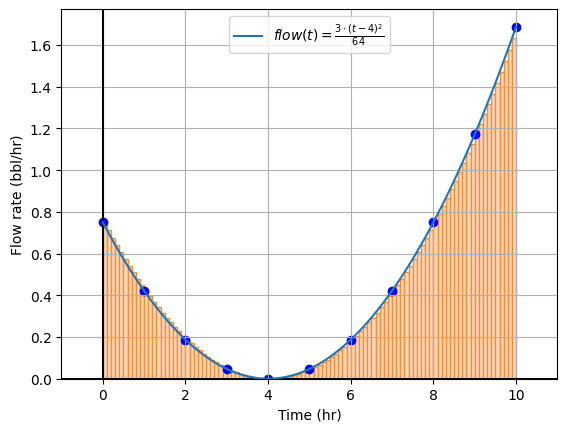

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

t_min = 0
t_max = 10


ts = np.linspace(t_min, t_max, 100)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Flow rate (bbl/hr)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

t_left_edges = np.arange(t_min, t_max, step = 1 / 10)
q_heights = [flow_rate(t) for t in t_left_edges]

plt.bar(t_left_edges, q_heights, align="edge", width=1 / 10, color="#FDD8BC", edgecolor="#F68D38")
ax.plot(ts, [flow_rate(t) for t in ts], label=flow_rate.__doc__)
ax.scatter(np.arange(t_min, t_max + 1, 1), [flow_rate(t) for t in np.arange(t_min, t_max + 1, 1)], color="blue")


ax.legend()
plt.show()

From these pictures, you can see that as our intervals get smaller and our computed result approaches the actual change in volume, the rectangles come closer and closer to filling the space under the flow rate graph.

The insight here is that the area under the flow rate graph on a given time interval is approximately equal to the volume added to the tank on the same interval.

A sum of the areas of rectangles approximating the area under a graph is called a **Riemann sum**. 

### Exercise

Approximately, how much oil is added to the tank in the first 6 hours? In the last 4 hours? During which time interval is more added?

We already have define the volume change formula that will give us an approximation of the volume change, which we can use to answer those questions:

In [1]:
import numpy as np

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def brief_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(brief_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))


print(f"a: {volume_change(flow_rate, 0, 6, 0.01)=}")
print(f"b: {volume_change(flow_rate, 6, 10, 0.01)=}")

a: volume_change(flow_rate, 0, 6, 0.01)=1.1278171874999996
b: volume_change(flow_rate, 6, 10, 0.01)=3.2425031249999257


We see that more oil is added in the interval that goes from $ t = 6 $ to $ t = 10 $.

We can check that it is a fairly good approximation for the real volume function too:

In [3]:
def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

print(f"a: {volume(6) - volume(0)=}")
print(f"b: {volume(10) - volume(6)=}")

a: volume(6) - volume(0)=1.125
b: volume(10) - volume(6)=3.25


## Plotting the volume over time

What we need to do now is to come up with an approximation of the volume function given the flow rate function, so that we can calculate the total volume of oil in the tank at any given point in time.

In order to come up with that function we need additional data. Consider the following situation:
> If oil flows into the tank at a constant rate of 1.2 bbl/hr for 3 hrs, how much oil is in the tank after 3 hrs?

We know that after 3 hours, the oil in the tank will have increased 3.6 hrs, but we cannot properly answer the question unless we know how much oil was in the tank to begin with. For example, if 0.5 bbls were in the tank to begin with, the answer would be $ 0.5 + 1.2 \times 3 hrs = 4.1 bbls $.

With those ideas in mind, and our recently defined `volume_change()` and `brief_volume_change()` we will implement a function `approximate_volume(q, v0, dt, t)` which takes:
+ a flow rate function `q`.
+ the initial volume of oil in the tank `v0`.
+ the small time interval `dt`.
+ the time for which the approximate volume is to be calculated `t`.

and will return the approximate value at that time `t`.

Afterwards, we will be able to curry the function to get `approximate_volume_function(q, v0, dt)` which will return a function that will give us the approximate volume as a function of time.

Then, we will be able to compare with our real `volume` function.


### Finding the volume over time

The basic formula we'll use is:

$
\text{volume at time T} = \text{(volume at time 0)} + \text{(change in volume from time 0 to time T)}
$

The first term of the sum will have to be provided, because there's no way to infer it from the flow rate function. But for the second term we can use our `volume_change()` function.

Thus:

In [1]:
def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def brief_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(brief_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, t):
    return v0 + volume_change(q, 0, t, dt)

And as explained earlier, we can define a function `approximate_volume_fn()` which will return the volume as a function of time.

We will be able to plot the curried function and reconstruct the `volume` function using this approximation:

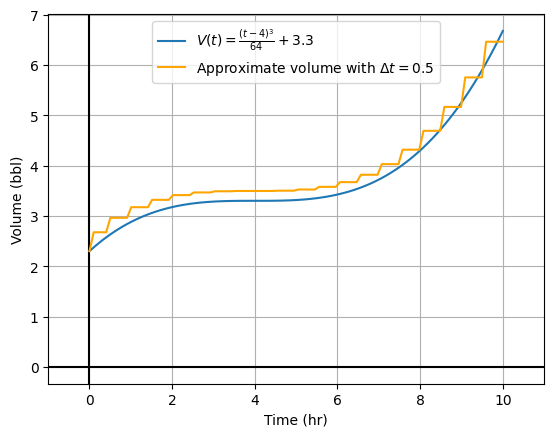

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def brief_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(brief_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, t):
    return v0 + volume_change(q, 0, t, dt)

def approximate_volume_fn(q, v0, dt):
    return lambda t: approximate_volume(q, v0, dt, t)

t_min = 0
t_max = 10


ts = np.linspace(t_min, t_max, 100)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

ax.plot(ts, [volume(t) for t in ts], label=volume.__doc__)
ax.plot(ts, [approximate_volume_fn(flow_rate, volume(0), 0.5)(t) for t in ts], color="orange", label="Approximate volume with $\\Delta t = 0.5$")


ax.legend()
plt.show()

We see that the output is a good approximation to the real volume function. 

We also see that the result produced by `approximate_volume_function` is jagged, which will probably have to do with the $ dt $ value (our intuition tells us that smaller values will get a smoother function).

### Picturing Riemann sums for the volume function

At any point in time, the volume in the tank computed by our `approximate_volume_function()` is the sum of the initial volume in the tank plus the change in volume for that point.

For example, for $ t = 4 hours $:

$
\text{volume at time 4} = \text{(volume at time 0)} + \text{(change in volume from time 0 to time 4 hrs)}
$

The result of this sum gives us one point on the graph at the 4-hr mark. The value at any other time is computed the same way.

Because the `approximate_volume_function()` ultimately relies on `brief_volume_change()` which models the volume change as the area of a rectangle under the `flow_rate_function()`, we can picture the volume at $ t = 4 $ as the area of the rectangles up to $ t = 4 $.

That is:

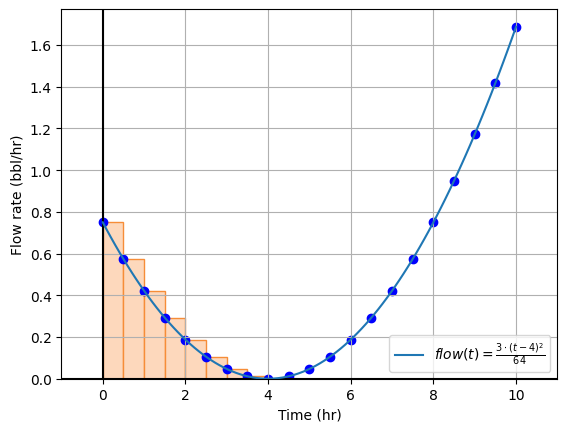

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

t_min = 0
t_max = 10


ts = np.linspace(t_min, t_max, 100)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Flow rate (bbl/hr)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

t_left_edges = np.arange(t_min, 4, step=0.5)
q_heights = [flow_rate(t) for t in t_left_edges]

plt.bar(t_left_edges, q_heights, align="edge", width=0.5, color="#FDD8BC", edgecolor="#F68D38")
ax.plot(ts, [flow_rate(t) for t in ts], label=flow_rate.__doc__)
ax.scatter(np.arange(t_min, t_max + 0.5, 0.5), [flow_rate(t) for t in np.arange(t_min, t_max + 0.5, 0.5)], color="blue")


ax.legend()
plt.show()

And if we annotate the plot for better clarity, we can see the relationship between the approximated volume function and the Riemann sums:

![Riemann sums and volume](pics/volume_fn_and_riemann_sums.png)

And we can check using Python:

In [15]:
import numpy as np


def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def brief_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(brief_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, t):
    return v0 + volume_change(q, 0, t, dt)

def approximate_volume_fn(q, v0, dt):
    return lambda t: approximate_volume(q, v0, dt, t)

print(f"{approximate_volume_fn(flow_rate, volume(0), 0.5)(4)=}")

v0 = volume(0)
rectangles_area = 0
for i in np.arange(0, 4, step=0.5):
    rectangles_area += flow_rate(i) * 0.5

print(f"{v0 + rectangles_area=}")


approximate_volume_fn(flow_rate, volume(0), 0.5)(4)=3.4953125
v0 + rectangles_area=3.4953125


We could do the same for any other point:

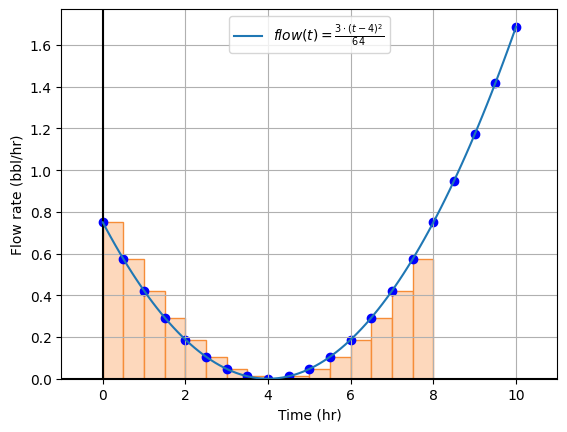

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

t_min = 0
t_max = 10


ts = np.linspace(t_min, t_max, 100)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Flow rate (bbl/hr)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

dt = 0.5
t_target = 8

t_left_edges = np.arange(t_min, t_target, step=dt)
q_heights = [flow_rate(t) for t in t_left_edges]

plt.bar(t_left_edges, q_heights, align="edge", width=dt, color="#FDD8BC", edgecolor="#F68D38")
ax.plot(ts, [flow_rate(t) for t in ts], label=flow_rate.__doc__)
ax.scatter(np.arange(t_min, t_max + dt, dt), [flow_rate(t) for t in np.arange(t_min, t_max + dt, dt)], color="blue")


ax.legend()
plt.show()

In [14]:
import numpy as np


def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def brief_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(brief_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, t):
    return v0 + volume_change(q, 0, t, dt)

def approximate_volume_fn(q, v0, dt):
    return lambda t: approximate_volume(q, v0, dt, t)

dt = 0.5
t_goal = 8
print(f"{approximate_volume_fn(flow_rate, volume(0), dt)(t_goal)=}")

v0 = volume(0)
rectangles_area = 0
for i in np.arange(0, t_goal, step=dt):
    rectangles_area += flow_rate(i) * dt

print(f"{v0 + rectangles_area=}")


approximate_volume_fn(flow_rate, volume(0), dt)(t_goal)=4.315625
v0 + rectangles_area=4.315625


In this case we had to sum $ 8 / 0.5 = 16 $ rectangle areas.

In both cases, $ t = 4 $, $ t = 8 $, those values will show up in the volume graph:

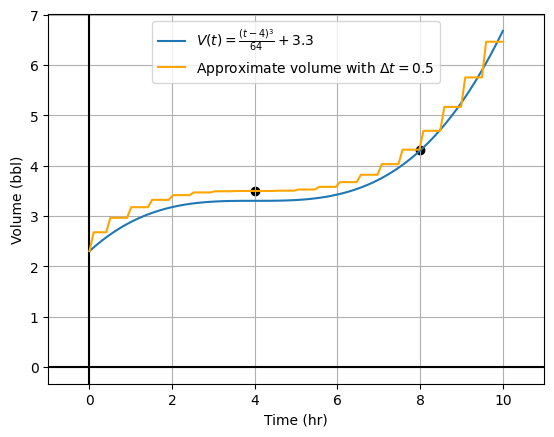

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def brief_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(brief_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, t):
    return v0 + volume_change(q, 0, t, dt)

def approximate_volume_fn(q, v0, dt):
    return lambda t: approximate_volume(q, v0, dt, t)

t_min = 0
t_max = 10


ts = np.linspace(t_min, t_max, 100)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

ax.plot(ts, [volume(t) for t in ts], label=volume.__doc__)
ax.plot(ts, [approximate_volume_fn(flow_rate, volume(0), 0.5)(t) for t in ts], color="orange", label="Approximate volume with $\\Delta t = 0.5$")

ax.scatter([4, 8], [3.4953125, 4.315625], color="k")

ax.legend()
plt.show()

In both of these cases, we could get from zero to the point in time in question using a whole number of timesteps.

But how does our code get the approximate value for $ t = 3.9 $ hrs, which isn't divisible by the $ dt $ value of 0.5 hrs.

To compute the intervals, we use:

```python
def volume_change(q, t1, t2, dt):
    return sum(brief_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))
```

Thus, `np.arange(t1, t2, dt)` is the expression that returns the intervals. For $ t = 3.9 $ hrs, we would call the function with `t1 = 0`, `t2 = 3.9`, `dt = 0.5`, which will result in the following intervals:

In [1]:
import numpy as np

np.arange(0, 3.9, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5])

Note that, even though the eight rectangles of width 0.5 hr go past the 3.9 hr mark, we still calculate the area of all eight. This could be improved by making the last interval shorter (using 0.4 hrs, instead of 0.5 hrs), but that tends to have very little significance as we make our `dt` smaller and smaller to get better approximations:

### Improving the approximation

Let's try using smaller values of `dt`, which will correspond to smaller rectangle sizes, and see the improvements we get.

The diagram below shows the Riemann sums graph for `dt = 0.1`:

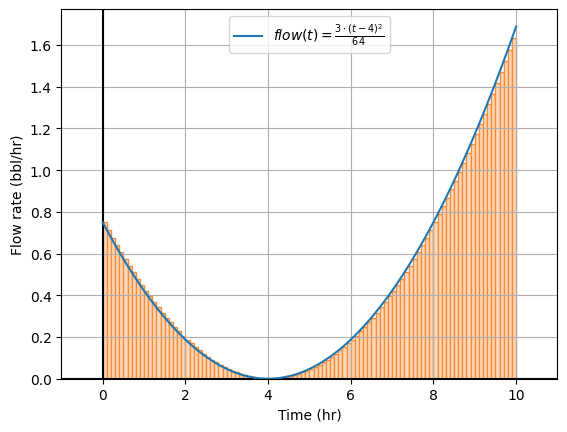

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

t_min = 0
t_max = 10


ts = np.linspace(t_min, t_max, 100)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Flow rate (bbl/hr)")
ax.set_xlim(t_min - (t_max - t_min) * 0.1, t_max + (t_max - t_min) * 0.1)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

dt = 0.1
t_target = 10

t_left_edges = np.arange(t_min, t_target, step=dt)
q_heights = [flow_rate(t) for t in t_left_edges]

plt.bar(t_left_edges, q_heights, align="edge", width=dt, color="#FDD8BC", edgecolor="#F68D38")
ax.plot(ts, [flow_rate(t) for t in ts], label=flow_rate.__doc__)
# ax.scatter(np.arange(t_min, t_max + dt, dt), [flow_rate(t) for t in np.arange(t_min, t_max + dt, dt)], color="blue")


ax.legend()
plt.show()

Now our rectangles follows more closely the `flow_rate` function, so the expectation is that our `approximate_volume_fn` will also be a better approximation of the real `volume` function:

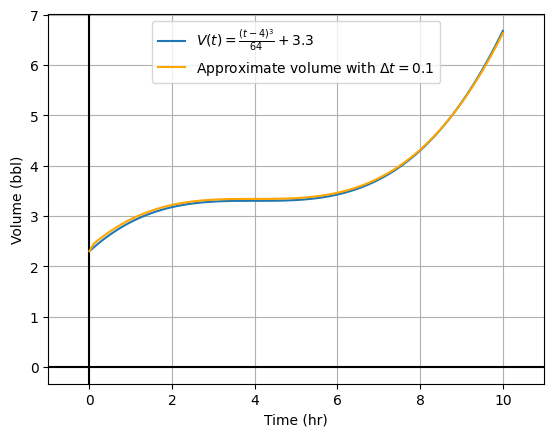

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def brief_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(brief_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, t):
    return v0 + volume_change(q, 0, t, dt)

def approximate_volume_fn(q, v0, dt):
    return lambda t: approximate_volume(q, v0, dt, t)

t_min = 0
t_max = 10
dt = 0.1


ts = np.linspace(t_min, t_max, 100)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(t_min - (t_max - t_min) * dt, t_max + (t_max - t_min) * dt)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

ax.plot(ts, [volume(t) for t in ts], label=volume.__doc__)
ax.plot(ts, [approximate_volume_fn(flow_rate, volume(0), dt)(t) for t in ts], color="orange", label=f"Approximate volume with $\\Delta t = {dt}$")

ax.legend()
plt.show()

And if we make the `dt` even smaller, the graphs will appear to match exactly:

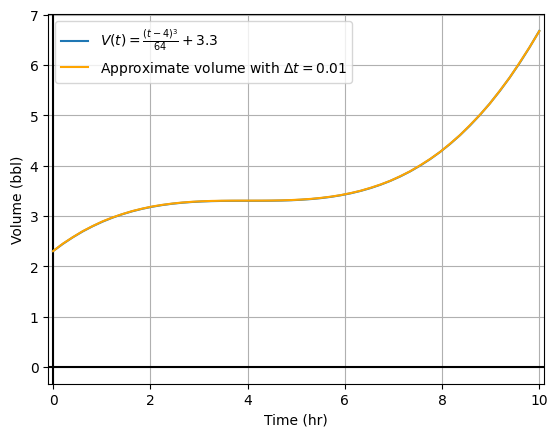

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def brief_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(brief_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, t):
    return v0 + volume_change(q, 0, t, dt)

def approximate_volume_fn(q, v0, dt):
    return lambda t: approximate_volume(q, v0, dt, t)

t_min = 0
t_max = 10
dt = 0.01


ts = np.linspace(t_min, t_max)
_, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Volume (bbl)")
ax.set_xlim(t_min - (t_max - t_min) * dt, t_max + (t_max - t_min) * dt)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

ax.plot(ts, [volume(t) for t in ts], label=volume.__doc__)
ax.plot(ts, [approximate_volume_fn(flow_rate, volume(0), dt)(t) for t in ts], color="orange", label=f"Approximate volume with $\\Delta t = {dt}$")

ax.legend()
plt.show()

Thus, we could say that the graph of the approximate volume converge to the real volume function with smaller and smaller values of `dt`.

However, there will still be differences:

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def brief_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(brief_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, t):
    return v0 + volume_change(q, 0, t, dt)

def approximate_volume_fn(q, v0, dt):
    return lambda t: approximate_volume(q, v0, dt, t)

print(f"{approximate_volume_fn(flow_rate, volume(0), 0.01)(3.75)=}")
print(f"{volume(3.75)=}")

approximate_volume_fn(flow_rate, volume(0), 0.01)(3.75)=3.3034941406249994
volume(3.75)=3.299755859375


There's a way to fix that by enhancing our `approximate_volume_fn` with a parameter that lets us tailor how good we want our approximation to be, so that we don't need to test with different values of `dt`:

| NOTE: |
| :---- |
| The computation for 6 digits can take a while... |

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    """$ flow(t) = \\frac{3 \\cdot (t - 4)^2}{64} $"""
    return 3 * (t - 4) ** 2 / 64

def volume(t):
    """$ V(t) = \\frac{(t - 4)^3}{64} + 3.3 $"""
    return (t - 4) ** 3 / 64 + 3.3

def brief_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(brief_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, t):
    return v0 + volume_change(q, 0, t, dt)

def approximate_volume_fn(q, v0, dt):
    return lambda t: approximate_volume(q, v0, dt, t)

def get_volume_fn(q, v0, digits=6):
    def volume_fn(t):
        tolerance = 10 ** -digits
        dt = 1
        approx = v0 + volume_change(q, 0, t, dt)
        for _ in range(digits * 2):
            dt = dt / 10
            next_approx = v0 + volume_change(q, 0, t, dt)
            if abs(next_approx - approx) < tolerance:
                return round(next_approx, digits)
            else:
                approx = next_approx
        raise Exception(f"Volume did not converge in {digits * 2} iterations")
    return volume_fn

print(f"{approximate_volume_fn(flow_rate, volume(0), 0.01)(3.75)=}")
print(f"{get_volume_fn(flow_rate, volume(0), digits=6)(3.75)=}")
print(f"{volume(3.75)=}")

approximate_volume_fn(flow_rate, volume(0), 0.01)(3.75)=3.3034941406249994
get_volume_fn(flow_rate, volume(0), digits=6)(3.75)=3.299756
volume(3.75)=3.299755859375


### Definite and indefinite integrals

In the last sections, we **integrated** the flow rate function to obtain the volume function.

Like taking a derivative, finding an integral is a general procedure that you can do with functions.

We can integrate any function specifying a rate of change to get a function giving a compatible, cumulative value.

For example, if we know the speed of a car as a function of time, we can integrate it to obtain the function of the distance traveled as a function of time.

There are two types of integrals: definite and indefinite integrals.

A **definite integral** tells you the total change in a function on some interval from its derivative function. The function and a pair of start and end values for the argument, specify the definite integral. The output is a single number which gives the cumulative change.

For instance, if $ f(x) $ is our function of interest and $ f'(x) $ is its derivative, then the change in $ f $ from $ x = a $ to $ x = b $ is $ f(b) - f(a) $ and it can be found taking a definite integral between $ a $ and $ b $ which is written like:

$
\displaystyle \int_{a}^{b} f'(x) \; dx = f(b) - f(a)
$


The symbol $ \int $ is the integral symbol, and $ a $ and $ b $ are called the *bounds of integration*. $ f'(x) $ is the function being integrated and $ dx $ indicates that the integral is taken with respect to $ x $ (therefore, in our volume examples we'd use $ dt $).

Our `volume_change()` function approximates definite integrals, and it also approximates the area under the graph.

It turns out that the definite integral of a function is equal to the area under the rate graph on that interval.

The **indefinite integral** takes the derivative of a function and recovers the original function. For instance, if you know that $ f'(x) $ is the derivative of $ f(x) $, then to reconstruct $ f(x) $ you have to find the indefinite integral of $ f'(x) $.

The catch is that, as we saw, to reconstruct the function from the derivative, you also need to know the initial value of $ f(x) $, such as $ f(0) $.

That fact, let us link both definite and indefinite integrals, because:


$
\displaystyle \int_{a}^{b} f'(x) \; dx = f(b) - f(a) \\
f(x) - f(0) = \int_{0}^{x} f'(t) \; dt \Rightarrow f(x) = f(0) + \int_{0}^{x} f'(t) \; dt \\
$

Note that we use different name $ t $ for the argument of $ f $ because $ x $ becomes a bound of integration here.

The indefinite integral can be written as:

$
\displaystyle f(x) = \int f'(x) \; dx \\
$

If, for example, $ g(x) = \int f(x) \; dx $, then $ g(x) $ is said to be an antiderivative of $ f(x) $.

Antiderivatives are not unique, and in fact, there is a different function $ g(x) $ whose derivative is $ f(x) $ for any initial value $ g(0) $ that you choose.